In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10= tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
#no of classes
K=len(set(y_train))
print('no of classes', K)

no of classes 10


In [ ]:
#build the model using functional API
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i, x)


In [ ]:
#compile and fit
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)


Epoch 1/15
1563/1563 [==============================] - 423s 270ms/step - loss: 1.7682 - accuracy: 0.4432 - val_loss: 1.0659 - val_accuracy: 0.6202
Epoch 2/15
1563/1563 [==============================] - 425s 272ms/step - loss: 0.8907 - accuracy: 0.6906 - val_loss: 0.9349 - val_accuracy: 0.6765
Epoch 3/15
1563/1563 [==============================] - 427s 273ms/step - loss: 0.6910 - accuracy: 0.7600 - val_loss: 0.6915 - val_accuracy: 0.7635
Epoch 4/15
1563/1563 [==============================] - 424s 271ms/step - loss: 0.5656 - accuracy: 0.8070 - val_loss: 0.6584 - val_accuracy: 0.7764
Epoch 5/15
1563/1563 [==============================] - 424s 271ms/step - loss: 0.4598 - accuracy: 0.8407 - val_loss: 0.6654 - val_accuracy: 0.7787
Epoch 6/15
1563/1563 [==============================] - 423s 271ms/step - loss: 0.3866 - accuracy: 0.8651 - val_loss: 0.7461 - val_accuracy: 0.7708
Epoch 7/15
1563/1563 [==============================] - 421s 270ms/step - loss: 0.3190 - accuracy: 0.8905 - val_

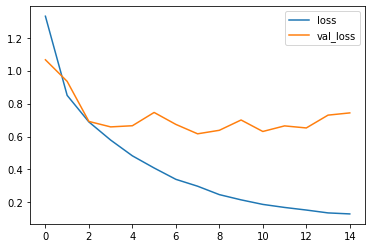

In [ ]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

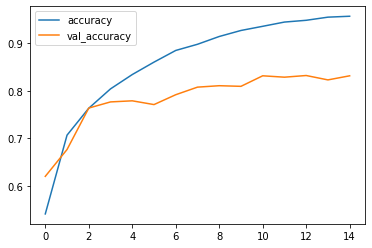

In [ ]:
#plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

confusion_matrix without normalisation
[[842  10  36  13  10  11   7   8  37  26]
 [  8 918   4   3   0   3   5   1   8  50]
 [ 31   3 731  56  50  61  42  16   7   3]
 [ 20   4  46 709  20 124  50  19   4   4]
 [  9   3  48  65 773  41  29  30   2   0]
 [  5   2  19  97  27 814  16  18   2   0]
 [  5   3  23  55  19  14 866   9   5   1]
 [  6   1  10  30  31  32   4 881   0   5]
 [ 41  19   9   9   4   8   8   4 878  20]
 [ 10  36   6  14   1   0   9   9  15 900]]


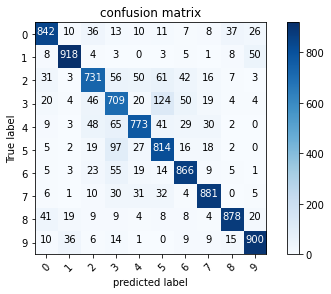

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix 
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion matrix',cmap=plt.cm.Blues):
  #normalisation can be applied by setting it True
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalised confusion matrix')
  else:
    print('confusion_matrix without normalisation')
  print(cm)
  
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i, j]>thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
 #label mapping
 labels=''' airplane
 automobile
 bird
 cat
 deer
 dog
 frog
 horse
 ship
 truck'''.split()

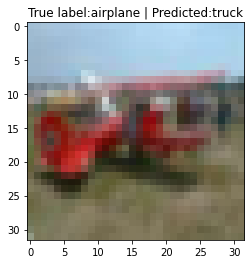

In [ ]:
#show some misclassified examples
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label:%s | Predicted:%s' % (labels[y_test[i]],labels[p_test[i]]));

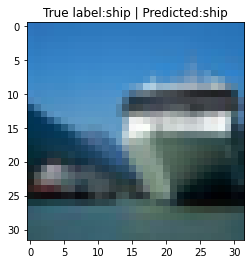

In [ ]:
#show some correclty classified  examples
correctlyclassified_idx=np.where(p_test==y_test)[0]
i=np.random.choice(correctlyclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label:%s | Predicted:%s' % (labels[y_test[i]],labels[p_test[i]]));

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 